# CSE3009 - Internet Of Things Project

## RNN model for Temperature prediction

Team members-
1. Hartej Singh (19BCT0168)
2. Aniruddha Sharma (19BCT0166)
3. Saurabh Dahale (19BCT0179)
4. Parth Maitrey (19BCT0188)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv(r"D:\VIT\Semester-5\B1 CSE3009 (IoT)\Project\archive\iot_telemetry_data.csv")
x = 10000
df = []
for i in range(len(dataset["device"])):
    if dataset.device[i] == "1c:bf:ce:15:ec:4d":
        df.append(dataset.temp[i])
train_set = df[:x+1]
train_set = np.array(train_set).reshape(-1,1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_training = sc.fit_transform(train_set)
scaled_training.size

10001

In [5]:
x_train = []
y_train = []
days = 30
size = scaled_training.size
 
for i in range(days, size):
    x_train.append(scaled_training[i-days:i, 0])
    y_train.append(scaled_training[i,0])

In [6]:
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.ndim, y_train.ndim)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train[0]

2 1


array([[0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074],
       [0.95390074]])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=days, return_sequences=True, input_shape=(days,1))) 
model.add(Dropout(0.2))
model.add(LSTM(units=days, return_sequences=True, input_shape=(days,1))) 
model.add(Dropout(0.2))
model.add(LSTM(units=days, return_sequences=True, input_shape=(days,1))) 
model.add(Dropout(0.2))
model.add(LSTM(units=days)) 
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["mae", "mse"])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
312/312 [==============================] - 15s 27ms/step - loss: 0.0281 - mae: 0.1075 - mse: 0.0281
Epoch 2/10
312/312 [==============================] - 9s 29ms/step - loss: 0.0089 - mae: 0.0725 - mse: 0.0089
Epoch 3/10
312/312 [==============================] - 11s 35ms/step - loss: 0.0081 - mae: 0.0691 - mse: 0.0081
Epoch 4/10
312/312 [==============================] - 11s 35ms/step - loss: 0.0073 - mae: 0.0654 - mse: 0.0073
Epoch 5/10
312/312 [==============================] - 11s 35ms/step - loss: 0.0063 - mae: 0.0607 - mse: 0.0063
Epoch 6/10
312/312 [==============================] - 11s 35ms/step - loss: 0.0057 - mae: 0.0568 - mse: 0.0057
Epoch 7/10
312/312 [==============================] - 10s 32ms/step - loss: 0.0051 - mae: 0.0532 - mse: 0.0051
Epoch 8/10
312/312 [==============================] - 10s 33ms/step - loss: 0.0044 - mae: 0.0490 - mse: 0.0044
Epoch 9/10
312/312 [==============================] - 10s 32ms/step - loss: 0.0038 - mae: 0.0444 - mse: 0.0038
Ep

In [8]:
# dataset_test = pd.read_csv(r"D:\VIT\Semester-5\B1 CSE3009 (IoT)\Project\archive\iot_telemetry_data.csv")
# y_test = df[x+1:x+1001]
y_test = df[x+1:x+1001]
y_test = np.array(y_test).reshape(-1,1)
print(y_test.shape)
y_test[29]

(1000, 1)


array([28.10000038])

In [9]:
# inputs = dataset_test.iloc[:, 3:4].values
# inputs = df[x+1:]
inputs = df[x+1:]
inputs = np.array(inputs)
inputs = inputs.reshape(-1,1)
inputs = sc.fit_transform(inputs)
inputs.shape

(95917, 1)

In [10]:
x_test = []
y_test2 = []
for i in range(days, days+1000):
    x_test.append((inputs[i-days:i , 0]))
    y_test2.append((inputs[i,0]))
x_test = np.array(x_test)
print(x_test.shape)
x_test = np.reshape(x_test, (1000,days,1))
x_test[29]

(1000, 30)


array([[0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065],
       [0.91830065]])

In [11]:
y_pred = model.predict(x_test)
y_pred = sc.inverse_transform((y_pred))
y_pred.shape

(1000, 1)

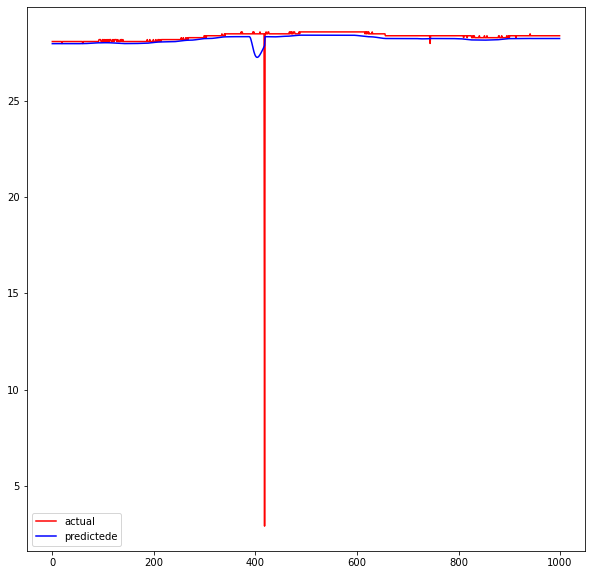

In [13]:
plt.rcParams["figure.figsize"]=10,10
plt.plot(y_test, color = 'red', label="actual")
plt.plot(y_pred, color = 'blue', label="predictede")
plt.legend()
plt.savefig(r"D:\VIT\Semester-5\B1 CSE3009 (IoT)\Project\R2\AI_model_output", dpi=100, bbox_inches='tight', pad_inches=0)
plt.show()

In [14]:
import random
temp = []
for i in range(0,30):
    temp.append(random.randint(50, 85))
print(temp)

[53, 56, 68, 51, 79, 75, 76, 65, 72, 58, 65, 78, 66, 68, 54, 66, 84, 71, 71, 51, 61, 66, 52, 76, 71, 61, 66, 79, 73, 57]


In [15]:
temp = np.array(temp)
temp = temp.reshape(-1,1)
temp = sc.fit_transform(temp)
temp = np.reshape(temp, (1,30,1))
print(temp.shape)

(1, 30, 1)


In [16]:
y_temp = model.predict([temp])
y_temp

array([[0.48042414]], dtype=float32)

In [17]:
y_temp = sc.inverse_transform(y_temp)
y_temp

array([[66.854]], dtype=float32)

In [18]:
model.save("RNNmodel-Temperature.h5")

In [20]:
import joblib
joblib.dump(sc, "scaler2")

['scaler2']